In [1]:
import pandas as pd
import seaborn as sb
import sklearn.neural_network as sknn

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = sb.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df = pd.get_dummies(df,columns=['color','clarity','cut'])

In [6]:
df.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
carat            53940 non-null float64
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null int64
x                53940 non-null float64
y                53940 non-null float64
z                53940 non-null float64
color_D          53940 non-null uint8
color_E          53940 non-null uint8
color_F          53940 non-null uint8
color_G          53940 non-null uint8
color_H          53940 non-null uint8
color_I          53940 non-null uint8
color_J          53940 non-null uint8
clarity_I1       53940 non-null uint8
clarity_IF       53940 non-null uint8
clarity_SI1      53940 non-null uint8
clarity_SI2      53940 non-null uint8
clarity_VS1      53940 non-null uint8
clarity_VS2      53940 non-null uint8
clarity_VVS1     53940 non-null uint8
clarity_VVS2     53940 non-null uint8
cut_Fair         53940 non-null uint8
cut_G

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
     df.drop(['price'],axis=1), df.price, test_size=0.33, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.981053595350205

In [11]:
###########################
# create MLP Regressor
# add hidden layer = 12, 11
# 1. check how to print the loss along the iterations
# 2. how to stop the training when the score is not changing more than 0.5% for three iterations?

In [12]:
model = sknn.MLPRegressor(max_iter=1000, hidden_layer_sizes= (12,11), verbose=True,
                         early_stopping=True, n_iter_no_change= 3, tol=0.005)
model.fit(X_train, y_train)

Iteration 1, loss = 15459761.38456450
Validation score: -0.861248
Iteration 2, loss = 13442820.71945870
Validation score: -0.448169
Iteration 3, loss = 9445582.48770248
Validation score: 0.009033
Iteration 4, loss = 7702571.64072082
Validation score: 0.046483
Iteration 5, loss = 7604935.62875154
Validation score: 0.054463
Iteration 6, loss = 7540380.85478133
Validation score: 0.062973
Iteration 7, loss = 7467150.27214383
Validation score: 0.072824
Iteration 8, loss = 7381852.72052317
Validation score: 0.084470
Iteration 9, loss = 7276704.98927654
Validation score: 0.098906
Iteration 10, loss = 7140116.83154827
Validation score: 0.118993
Iteration 11, loss = 6952408.22643964
Validation score: 0.146628
Iteration 12, loss = 6641484.93671011
Validation score: 0.197732
Iteration 13, loss = 6151368.89330123
Validation score: 0.267729
Iteration 14, loss = 5523786.55259531
Validation score: 0.352993
Iteration 15, loss = 4810935.74752327
Validation score: 0.443700
Iteration 16, loss = 4076783.1

MLPRegressor(early_stopping=True, hidden_layer_sizes=(12, 11), max_iter=1000,
             n_iter_no_change=3, tol=0.005, verbose=True)

In [13]:
y_pred = model.predict(X_test)

In [14]:
###########################
# scatter the pred vs y_test
# scatter the historgram of the error
# what is the final score? 
# is it the same as the last score above? if not, why?

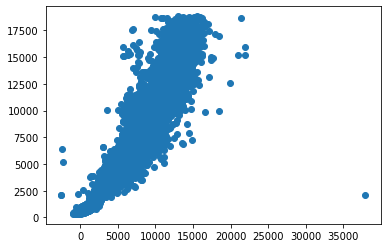

In [15]:
plt.scatter(y_pred, y_test)

<AxesSubplot:xlabel='price'>

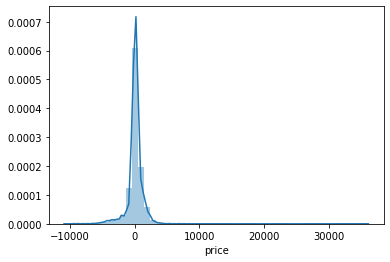

In [16]:
sb.distplot(y_pred-y_test)

In [17]:
model.score(X_test,y_test)

0.9088847728745769

In [18]:
#############################################
# investigate  - max_iter, batch_size. beside that, use only parameter of layer=12,11
# 1. what is the score when max_iter=20 
# 2. how changing batch size influence that?
# 3. what happens when you don't specify batch size?

In [19]:
model1 = sknn.MLPRegressor(max_iter=10, hidden_layer_sizes= (12,11), verbose=True,
                          batch_size=200)
model1.fit(X_train, y_train)

Iteration 1, loss = 15059528.34143420
Iteration 2, loss = 11508760.98058406
Iteration 3, loss = 8022278.46028620
Iteration 4, loss = 7636799.91770188
Iteration 5, loss = 7563802.89849011
Iteration 6, loss = 7434895.25060333
Iteration 7, loss = 7258506.40692656
Iteration 8, loss = 7038970.87937361
Iteration 9, loss = 6759968.71793418
Iteration 10, loss = 6392198.76848624


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(batch_size=200, hidden_layer_sizes=(12, 11), max_iter=10,
             verbose=True)

In [20]:
model1 = sknn.MLPRegressor(max_iter=10, hidden_layer_sizes= (12,11), verbose=True,
                          batch_size=1)
model1.fit(X_train, y_train)

Iteration 1, loss = 5043853.45656805
Iteration 2, loss = 825010.47396695
Iteration 3, loss = 567689.04141850
Iteration 4, loss = 505014.00117611
Iteration 5, loss = 477108.56666361
Iteration 6, loss = 454754.11287091
Iteration 7, loss = 429198.34710361
Iteration 8, loss = 410297.21647653
Iteration 9, loss = 399460.19275452
Iteration 10, loss = 385151.34985384


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(batch_size=1, hidden_layer_sizes=(12, 11), max_iter=10,
             verbose=True)

In [21]:
#############################
# use model.coefs_ to print the below (put the rigth X's)
# "model has input layer with X features, X hidden layers with X,X neurons, and X outputs

In [22]:
model.coefs_

[array([[ 4.00338003e+000,  3.99500540e+000,  4.76475120e+000,
         -3.08253737e-002, -1.08437945e-059, -2.85083624e-001,
          5.17382174e+000, -4.14715580e+000, -1.12666863e-001,
          4.82681363e+000,  5.30691189e+000, -7.83937046e-090],
        [ 3.29000361e-001,  4.48934691e-001,  1.49546219e-001,
         -1.87497560e-001,  1.37279398e-090, -5.98160519e-002,
         -5.90043306e-001,  1.23351660e+000, -8.01838181e-002,
          3.22056288e-001, -6.10233410e-001, -5.30235805e-060],
        [ 1.28899685e-001,  4.07300331e-001,  2.60716444e-001,
          8.86944052e-003,  1.01941999e-066, -4.43050411e-002,
         -4.80657263e-001,  1.11236139e+000, -3.50823148e-002,
          1.50636118e-001, -4.93856367e-001, -4.15062610e-061],
        [ 2.93528075e+000,  3.31619221e+000,  2.77094059e+000,
         -7.07204327e-002, -1.27034280e-094, -1.88004019e-002,
          4.09769135e+000, -3.05534534e+000, -5.50033511e-002,
          3.36291276e+000,  4.07567801e+000, -8.2895

In [23]:
len(model.coefs_)

3

In [24]:
model.coefs_[0]

array([[ 4.00338003e+000,  3.99500540e+000,  4.76475120e+000,
        -3.08253737e-002, -1.08437945e-059, -2.85083624e-001,
         5.17382174e+000, -4.14715580e+000, -1.12666863e-001,
         4.82681363e+000,  5.30691189e+000, -7.83937046e-090],
       [ 3.29000361e-001,  4.48934691e-001,  1.49546219e-001,
        -1.87497560e-001,  1.37279398e-090, -5.98160519e-002,
        -5.90043306e-001,  1.23351660e+000, -8.01838181e-002,
         3.22056288e-001, -6.10233410e-001, -5.30235805e-060],
       [ 1.28899685e-001,  4.07300331e-001,  2.60716444e-001,
         8.86944052e-003,  1.01941999e-066, -4.43050411e-002,
        -4.80657263e-001,  1.11236139e+000, -3.50823148e-002,
         1.50636118e-001, -4.93856367e-001, -4.15062610e-061],
       [ 2.93528075e+000,  3.31619221e+000,  2.77094059e+000,
        -7.07204327e-002, -1.27034280e-094, -1.88004019e-002,
         4.09769135e+000, -3.05534534e+000, -5.50033511e-002,
         3.36291276e+000,  4.07567801e+000, -8.28953759e-071],
    

In [25]:
model.coefs_[0].shape

(26, 12)

In [26]:
model.coefs_[1].shape

(12, 11)

In [27]:
model.coefs_[2].shape

(11, 1)

In [28]:
26*12+12*11+11

455

In [29]:
print(f"model has input layer with {model.coefs_[0].shape[0] } features, \
{ len(model.coefs_)-1} hidden layers, \
with {model.coefs_[1].shape} neurons, \
and {model.coefs_[2].shape[1]} outputs")

model has input layer with 26 features, 2 hidden layers, with (12, 11) neurons, and 1 outputs
